In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [15]:
df = pd.read_csv('../Data/DC_Properties.csv')

C:\Users\Sverrir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df_loc = df.loc[:,['LATITUDE','LONGITUDE']].dropna()

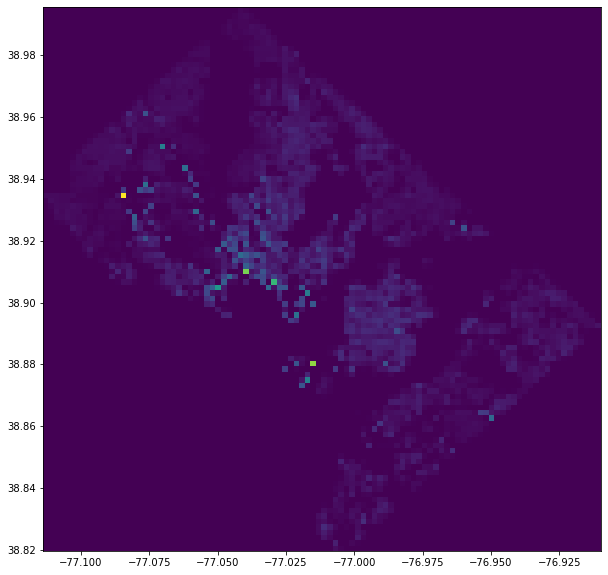

In [21]:
plt.figure(figsize=(10,10))
plt.hist2d(df_loc.LONGITUDE,df_loc.LATITUDE,bins=100)
plt.show()

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

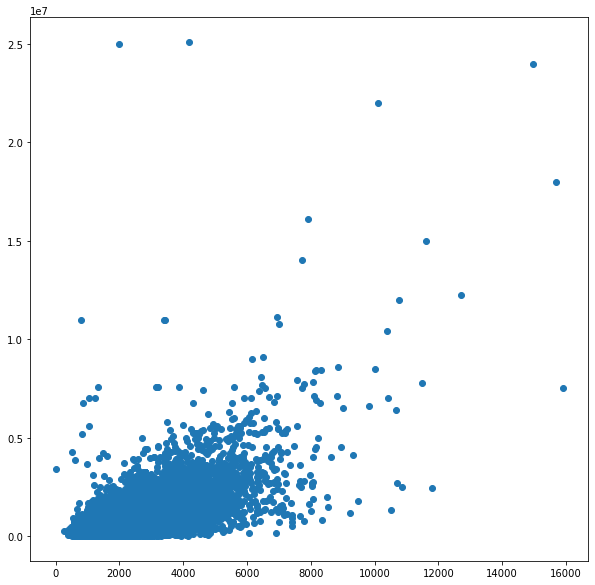

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(df.GBA,df.PRICE)
# plt.ylim(0,0.1e8)

In [36]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [35]:
from sklearn.linear_model import LinearRegression

(0, 4000000.0)

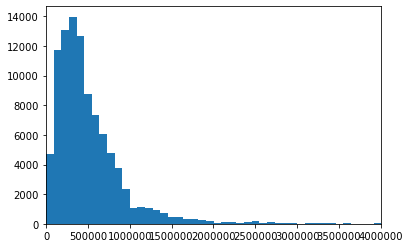

In [34]:
plt.hist(df[df.PRICE<0.1e8].PRICE,bins=100)b
plt.xlim(0,0.04e8)

In [84]:
from  missingno import matrix

0         1095000.0
2         2100000.0
3         1602000.0
5         1950000.0
7         1050000.0
            ...    
158951     389000.0
158952     399900.0
158953     416000.0
158954     600000.0
158955     215100.0
Name: PRICE, Length: 98216, dtype: float64

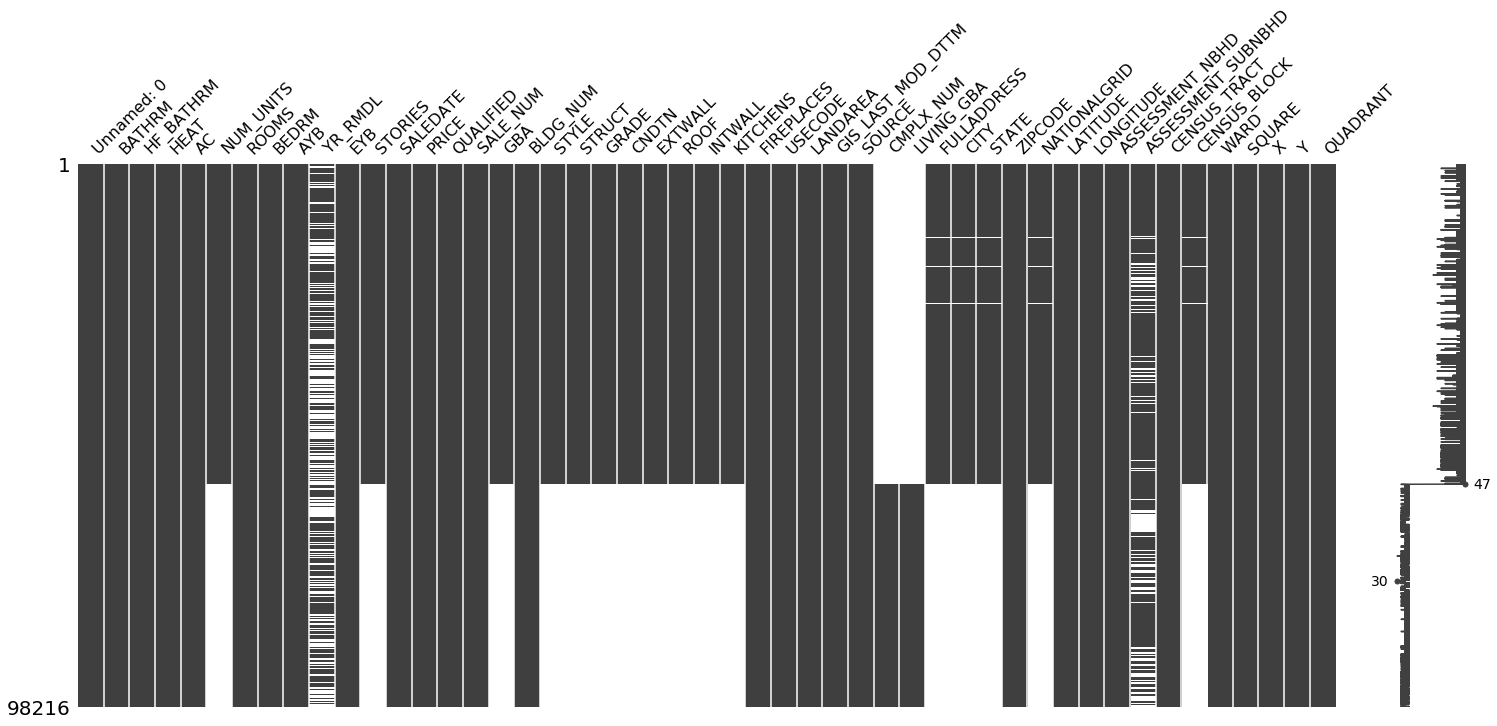

In [88]:
matrix(df.loc[df.PRICE.dropna().index,:])

In [64]:
df.loc[:,['GBA','KITCHENS']].dropna()

,GBA,KITCHENS
0,2522.0,2.0
1,2567.0,2.0
2,2522.0,2.0
3,2484.0,2.0
4,5255.0,1.0
...,...,...
106691,1600.0,2.0
106692,1600.0,2.0
106693,1600.0,2.0
106694,1600.0,2.0


In [76]:
X = df.loc[:,['GBA','KITCHENS']]
y = df.loc[:,'PRICE']

In [77]:
X = X.dropna()
y = y.dropna()
X = X.loc[y.index.intersection(X.index)]
y = y.loc[X.index]

In [81]:
len(X)

57899

In [78]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
import shapefile as shp

In [111]:
# First plot: All districts with number inside

def map_with_labels(df_geo,fig):
#     plt.figure()
    ax = plt.axes() # get current axes
    ax.set_aspect('equal') # to prevent distortion
    
    
    for district in df_geo.iterrows():
        # Plot outlines
        x_lon = np.array(district[1].coords)[:,0]
        y_lat = np.array(district[1].coords)[:,1]
        ax.plot(x_lon,y_lat, color='black')
        
        # Labels (find center and insert text)
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
#         plt.text(x0, y0, district[1].OBJECTID, fontsize=10)
    return ax
        


In [112]:
def shp_to_df(sf):
    # Extract labels and data
    fields = [x[0] for x in sf.fields[1:]] # Column values
    records = sf.records() # data for dataframe
    shape_data = [x.points for x in sf.shapes()]

    # Create dataframe with values
    df_geo = pd.DataFrame(columns=fields, data=records)
    df_geo['coords'] = shape_data
    
    return df_geo

Shp_path = '../Data/Census_Tracts_in_2010.shp'
sf = shp.Reader(Shp_path)
df_geo = shp_to_df(sf)

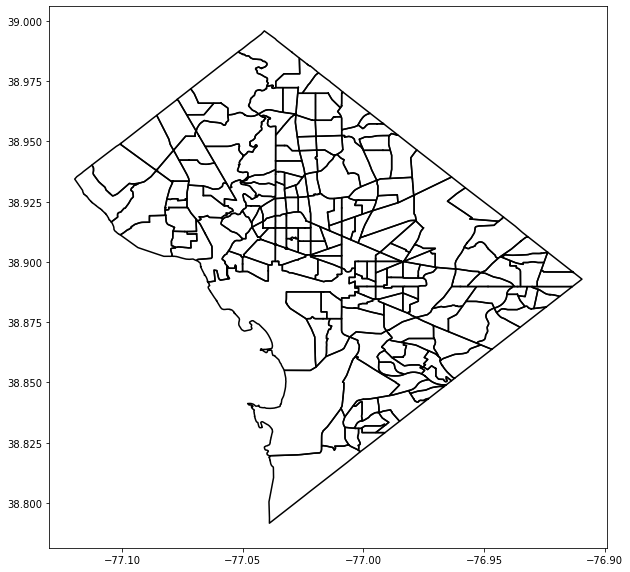

In [114]:
f = plt.figure(figsize=(10,10))
ax = map_with_labels(df_geo,f)


Text(0, 0.5, 'count')

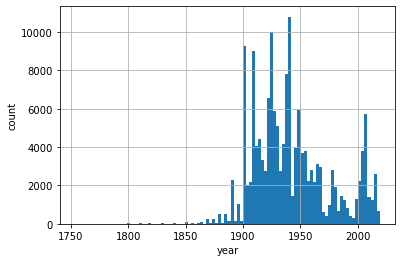

In [106]:
import json

from bokeh.io import output_file, show
from bokeh.models import GeoJSONDataSource
from bokeh.plotting import figure
from bokeh.sampledata.sample_geojson import geojson

output_file("geojson.html")

data = json.loads(geojson)
for i in range(len(data['features'])):
    data['features'][i]['properties']['Color'] = ['blue', 'red'][i%2]

geo_source = GeoJSONDataSource(geojson=json.dumps(data))

TOOLTIPS = [
    ('Organisation', '@OrganisationName')
]

p = figure(background_fill_color="lightgrey", tooltips=TOOLTIPS)
p.circle(x='x', y='y', size=15, color='Color', alpha=0.7, source=geo_source)

show(p)

In [123]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

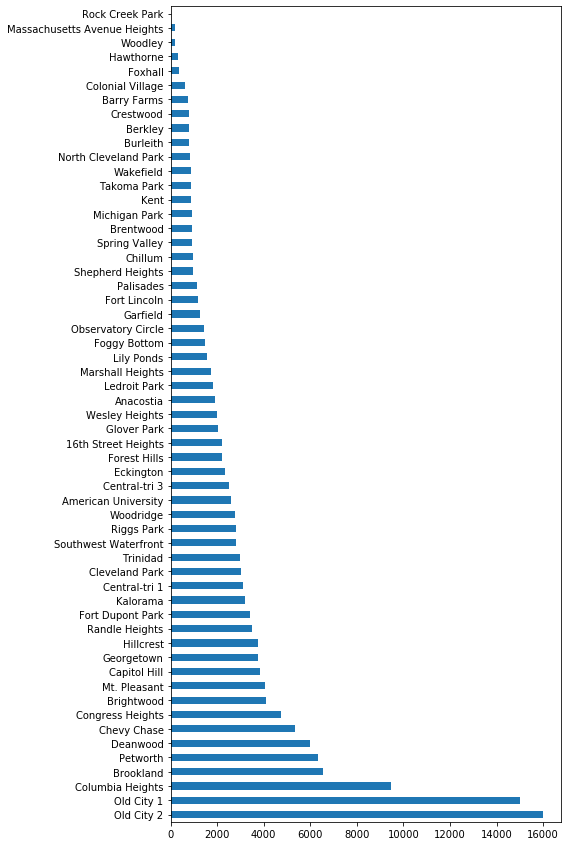

In [134]:
plt.figure(figsize=(7,15))
df.ASSESSMENT_NBHD.value_counts().plot(kind='barh')

In [137]:

top_10 = df.ASSESSMENT_NBHD.value_counts()[:10].index

In [142]:
top_10_df = df[df['ASSESSMENT_NBHD'].isin(top_10)]
mean_df = top_10_df.groupby(['ASSESSMENT_NBHD']).mean()

Text(0.5, 0, 'Neighbourhood')

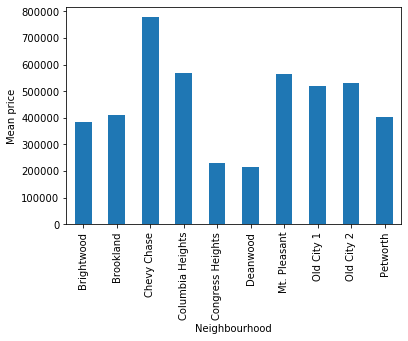

In [151]:
mean_df.loc[:,'PRICE'].plot(kind='bar')
plt.ylabel('Mean price')
plt.xlabel('Neighbourhood')


Text(0.5, 0, 'Neighbourhood')

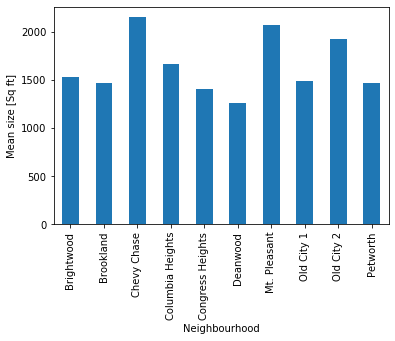

In [153]:
mean_df.loc[:,'GBA'].plot(kind='bar')
plt.ylabel('Mean size [Sq ft]')
plt.xlabel('Neighbourhood')


In [158]:
mean_df

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,...,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
ASSESSMENT_NBHD,,,,,,,,,,,,,,,,,,,,,
Brightwood,61741.581712,1.768482,0.573200,1.074826,6.875486,3.204280,1936.447202,2006.268028,1959.549125,1.971791,...,12.839494,3461.939932,3116.200000,1021.718919,20011.483463,38.968375,-77.024093,3437.652724,-77.024095,38.968377
Brookland,78625.515682,1.700518,0.515682,1.133262,6.589982,2.980968,1943.615467,2002.117965,1963.848508,2.023283,...,13.119062,2888.575061,3345.972775,817.648168,20014.465134,38.934789,-76.995109,9150.222138,-76.995128,38.934792
Chevy Chase,44724.921741,2.338812,0.810796,1.005026,7.605342,3.443780,1940.483190,1998.762050,1968.168099,2.102953,...,12.559395,5199.073216,3067.224525,960.556131,20014.953306,38.964533,-77.069178,1331.453679,-77.069184,38.964536
Columbia Heights,90353.376399,1.743403,0.305256,1.268510,5.792590,2.713532,1930.374855,2005.948655,1958.006544,2.198724,...,14.864788,1277.315178,2498.355731,874.356894,20008.633101,38.930312,-77.028680,3108.575997,-77.028681,38.930319
Congress Heights,105355.849228,1.649186,0.456968,1.287606,6.498203,2.872700,1956.462646,2002.472192,1966.271939,2.032243,...,13.998520,2722.022203,1713.993704,762.938090,20032.000000,38.835011,-76.999821,9765.868683,-76.999784,38.835008
Deanwood,89390.287314,1.578472,0.398629,1.138612,6.386428,2.906401,1950.418093,2003.863134,1965.007856,1.900463,...,13.079224,3191.300351,3109.248092,726.965649,20019.000000,38.896225,-76.931162,8205.658533,-76.931166,38.896242
Mt. Pleasant,95170.598963,1.840573,0.371915,1.449863,5.714956,2.609329,1935.868545,1999.660989,1958.322063,2.458630,...,15.833416,1268.736180,1987.141446,910.973507,20009.451629,38.927440,-77.040642,3229.705577,-77.040659,38.927457
Old City 1,44201.906333,1.763800,0.476600,1.265645,6.293133,2.776600,1928.347933,2000.637612,1964.660867,2.164284,...,14.139867,1278.774333,3196.872958,918.118373,20002.750267,38.891919,-76.989349,7891.674200,-76.989348,38.891919
Old City 2,93199.572975,1.634748,0.260984,1.553741,4.840844,1.975904,1942.530240,1994.594540,1960.572725,2.377718,...,16.566091,648.036863,2652.272711,824.014632,20007.404369,38.911008,-77.029671,4782.384404,-77.029673,38.911019


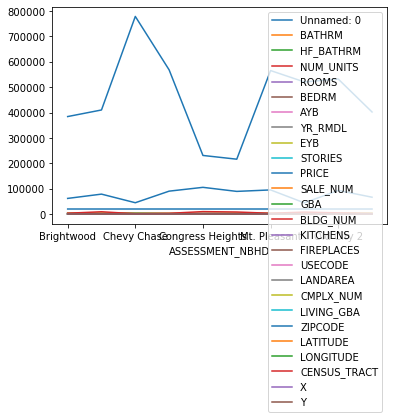

In [157]:
mean_df.plot()

In [ ]:
mean_df.loc[:,'GBA'].plot(kind='bar')
plt.ylabel('Mean size [Sq ft]')
plt.xlabel('Neighbourhood')


1140000.0

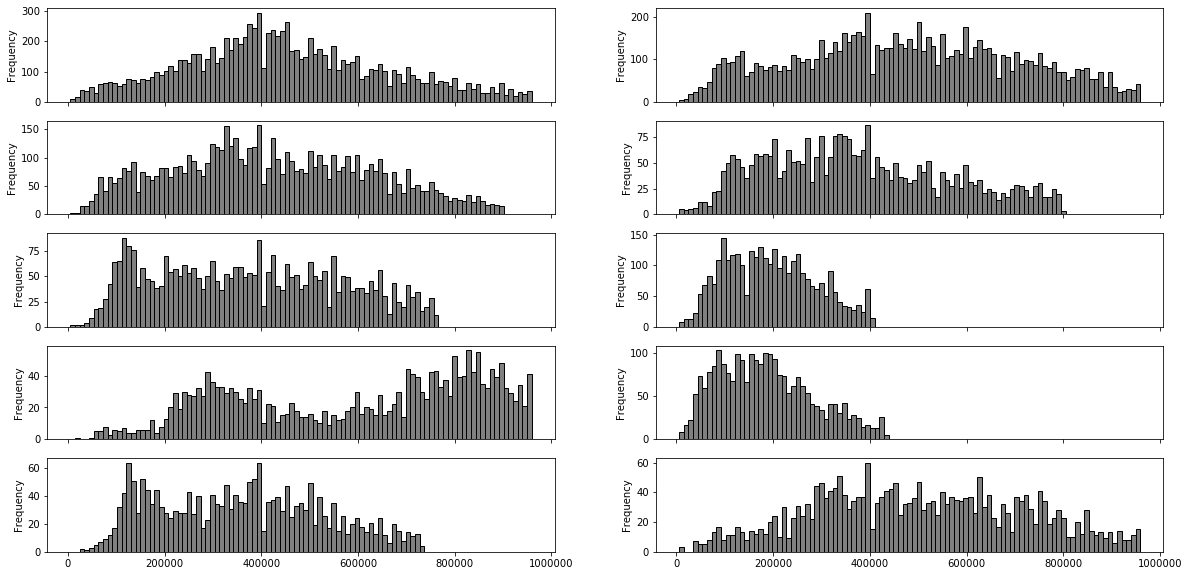

In [168]:
districts = top_10_df.loc[:,'ASSESSMENT_NBHD'].value_counts().index.values
# print(districts)
f,axes = plt.subplots(len(districts)//2,2, figsize=(20,10),sharex=True)

bins = np.linspace(df_sub.PRICE.quantile(0),df_sub.PRICE.quantile(0.95),100)
for district,ax in zip(districts,np.ravel(axes)):
    df_sub = df.loc[df['ASSESSMENT_NBHD'] == district]
    df_sub = df_sub[df_sub.PRICE < df_sub.PRICE.quantile(0.95)]
    df_sub.PRICE.plot(kind='hist',bins=bins,ax=ax,color='grey',edgecolor='black')
    
    
plt.show()

Text(0, 0.5, 'count')

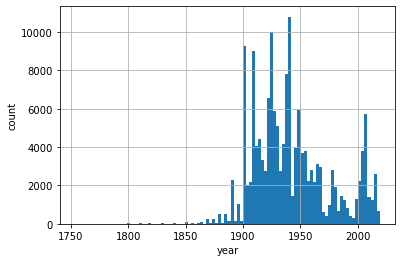

In [119]:
df.AYB.hist(bins=100)
plt.xlabel('year')
plt.ylabel('count')